In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

## Get Data

In [4]:
galaxyZoo2 = r'/home/rick/Proyectos/minIA.old/notebooks/DataCharacterization/zoo2MainSpecz.csv'
df_g = pd.read_csv(galaxyZoo2)
df = df_g.sample(n=5000, random_state=1)

In [5]:
classes = [
    'dr7objid',
    't08_odd_feature_a19_ring_weighted_fraction', 
    't08_odd_feature_a20_lens_or_arc_weighted_fraction', 
    't08_odd_feature_a21_disturbed_weighted_fraction', 
    't08_odd_feature_a22_irregular_weighted_fraction', 
    't08_odd_feature_a24_merger_weighted_fraction', 
    't08_odd_feature_a38_dust_lane_weighted_fraction',
    
    't11_arms_number_a31_1_weighted_fraction', 
    't11_arms_number_a32_2_weighted_fraction', 
    't11_arms_number_a33_3_weighted_fraction', 
    't11_arms_number_a34_4_weighted_fraction',
    
    't05_bulge_prominence_a10_no_bulge_weighted_fraction', 
    't05_bulge_prominence_a11_just_noticeable_weighted_fraction', 
    't05_bulge_prominence_a12_obvious_weighted_fraction', 
    't05_bulge_prominence_a13_dominant_weighted_fraction', 
    
    't07_rounded_a16_completely_round_weighted_fraction', 
    't07_rounded_a17_in_between_weighted_fraction', 
    't07_rounded_a18_cigar_shaped_weighted_fraction',
    
    't09_bulge_shape_a25_rounded_weighted_fraction', 
    't09_bulge_shape_a26_boxy_weighted_fraction', 
    't09_bulge_shape_a27_no_bulge_weighted_fraction',
    
    't10_arms_winding_a28_tight_weighted_fraction', 
    't10_arms_winding_a29_medium_weighted_fraction', 
    't10_arms_winding_a30_loose_weighted_fraction']

debiased = [
    'dr7objid',
    't08_odd_feature_a19_ring_debiased',
    't08_odd_feature_a20_lens_or_arc_debiased',
    't08_odd_feature_a21_disturbed_debiased',
    't08_odd_feature_a22_irregular_debiased',
    't08_odd_feature_a24_merger_debiased',
    't08_odd_feature_a38_dust_lane_debiased', 
    
    't11_arms_number_a31_1_debiased', 
    't11_arms_number_a32_2_debiased', 
    't11_arms_number_a33_3_debiased', 
    't11_arms_number_a34_4_debiased',
    't05_bulge_prominence_a10_no_bulge_debiased', 
    't05_bulge_prominence_a11_just_noticeable_debiased', 
    't05_bulge_prominence_a12_obvious_debiased', 
    't05_bulge_prominence_a13_dominant_debiased', 
    
    't07_rounded_a16_completely_round_debiased', 
    't07_rounded_a17_in_between_debiased',
    't07_rounded_a18_cigar_shaped_debiased',
    
    't09_bulge_shape_a25_rounded_debiased', 
    't09_bulge_shape_a26_boxy_debiased', 
    't09_bulge_shape_a27_no_bulge_debiased',
    
    't10_arms_winding_a28_tight_debiased', 
    't10_arms_winding_a29_medium_debiased', 
    't10_arms_winding_a30_loose_debiased']


In [22]:
labels = [
    't08_ring',
    't08_lens_or_arc',
    't08_disturbed',
    't08_irregular',
    't08_merger',
    't08_dust_lane', 
    
    't11_1', 
    't11_2', 
    't11_3', 
    't11_4',
    
    't05_no_bulge', 
    't05_just_noticeable', 
    't05_obvious', 
    't05_dominant', 
    
    't07_completely_round', 
    't07_in_between',
    't07_cigar_shaped',
    
    't09_rounded', 
    't09_boxy', 
    't09_no_bulge',
    
    't10_tight', 
    't10_medium', 
    't10_loose']

In [6]:
def classPerImage(df,criteria, threshold):
    df2 = df[criteria].copy()
    df2 = df2[df2 > threshold]
    df2.columns = range(len(df2.columns))
    names = df2[0]
    img_class = (df2.iloc[:, 1:]
                 .stack()
                 .reset_index()
                 .groupby(['level_0'], sort=False)['level_1']
                 .apply(list))
    img = pd.concat([names, img_class], axis=1)
    img.columns = ['id','classes']
    return img

In [7]:
def filterDS(df, criteria, threshold):
    df2 = df[criteria].copy()
    df2 = df2[df2 > threshold]
    df2.columns = range(len(df2.columns))
    return df2

In [8]:
def imagesPerClass(df):
    classes = list()
    for class_ in range(1, len(df.columns)):
        images_class = df[[0,class_]].dropna()[0].astype(str).tolist() #Hacer un downsapling para grnades
        classes.append(images_class)
    return classes

def createDSfile(ruta, df):
    images_class = imagesPerClass(df)
    id_classes = range(0,len(images_class))
    with open(ruta,'w') as dataset:
        dataset.write('type_galaxy_id,images\n')
        for class_id, img_class in zip(id_classes,images_class):
            images = ' '.join(img_class)
            dataset.write(str(class_id)+','+images+'\n')

In [39]:
def downsamplig(classes):
    random.seed(505)
    random.shuffle(classes[14])
    random.shuffle(classes[15])
    random.shuffle(classes[17])
    classes[14] =  classes[14][0:len(classes[14])//2]
    classes[15] =  classes[15][0:len(classes[15])//3]
    classes[17] =  classes[17][0:(len(classes[14])//5)*3]

In [16]:
for i in range(len(labels)):
    print(i,labels[i])

0 t08_ring
1 t08_lens_or_arc
2 t08_disturbed
3 t08_irregular
4 t08_merger
5 t08_dust_lane
6 t11_1
7 t11_2
8 t11_3
9 t11_4
10 t05_no_bulge
11 t05_just_noticeable
12 t05_obvious
13 t05_dominant
14 t07_completely_round
15 t07_in_between
16 t07_cigar_shaped
17 t09_rounded
18 t09_boxy
19 t09_no_bulge
20 t10_tight
21 t10_medium
22 t10_loose


### Clases asignadas utilizando weighted_fraction

In [35]:
img = classPerImage(df_g,classes,0.9)
print('Imágenes con almenos una clase asignada: ', 304122  - img['classes'].isna().sum())
img.head()

Imágenes con almenos una clase asignada:  240589


,id,classes
0,588017703996096547,NaN
1,587738569780428805,"[8, 17, 21]"
2,587735695913320507,[20]
3,587742775634624545,NaN
4,587732769983889439,"[17, 21]"


### Clases asignadas utilizando debiased

In [8]:
img = classPerImage(df_g,debiased,0.9)
print('Imágenes con almenos una clase asignada: ', 304122  - img['classes'].isna().sum())
img.head()

Imágenes con almenos una clase asignada:  240995


,id,classes
0,588017703996096547,NaN
1,587738569780428805,"[8, 17, 21]"
2,587735695913320507,[20]
3,587742775634624545,NaN
4,587732769983889439,"[17, 21]"


### Creación de archivo con elementos por clase

In [40]:
ruta = r'/home/rick/Proyectos/minIA/datasetGZ2.csv'
df_img = filterDS(df_g, classes,0.8) # use df for testing
img_per_class = imagesPerClass(df_img)

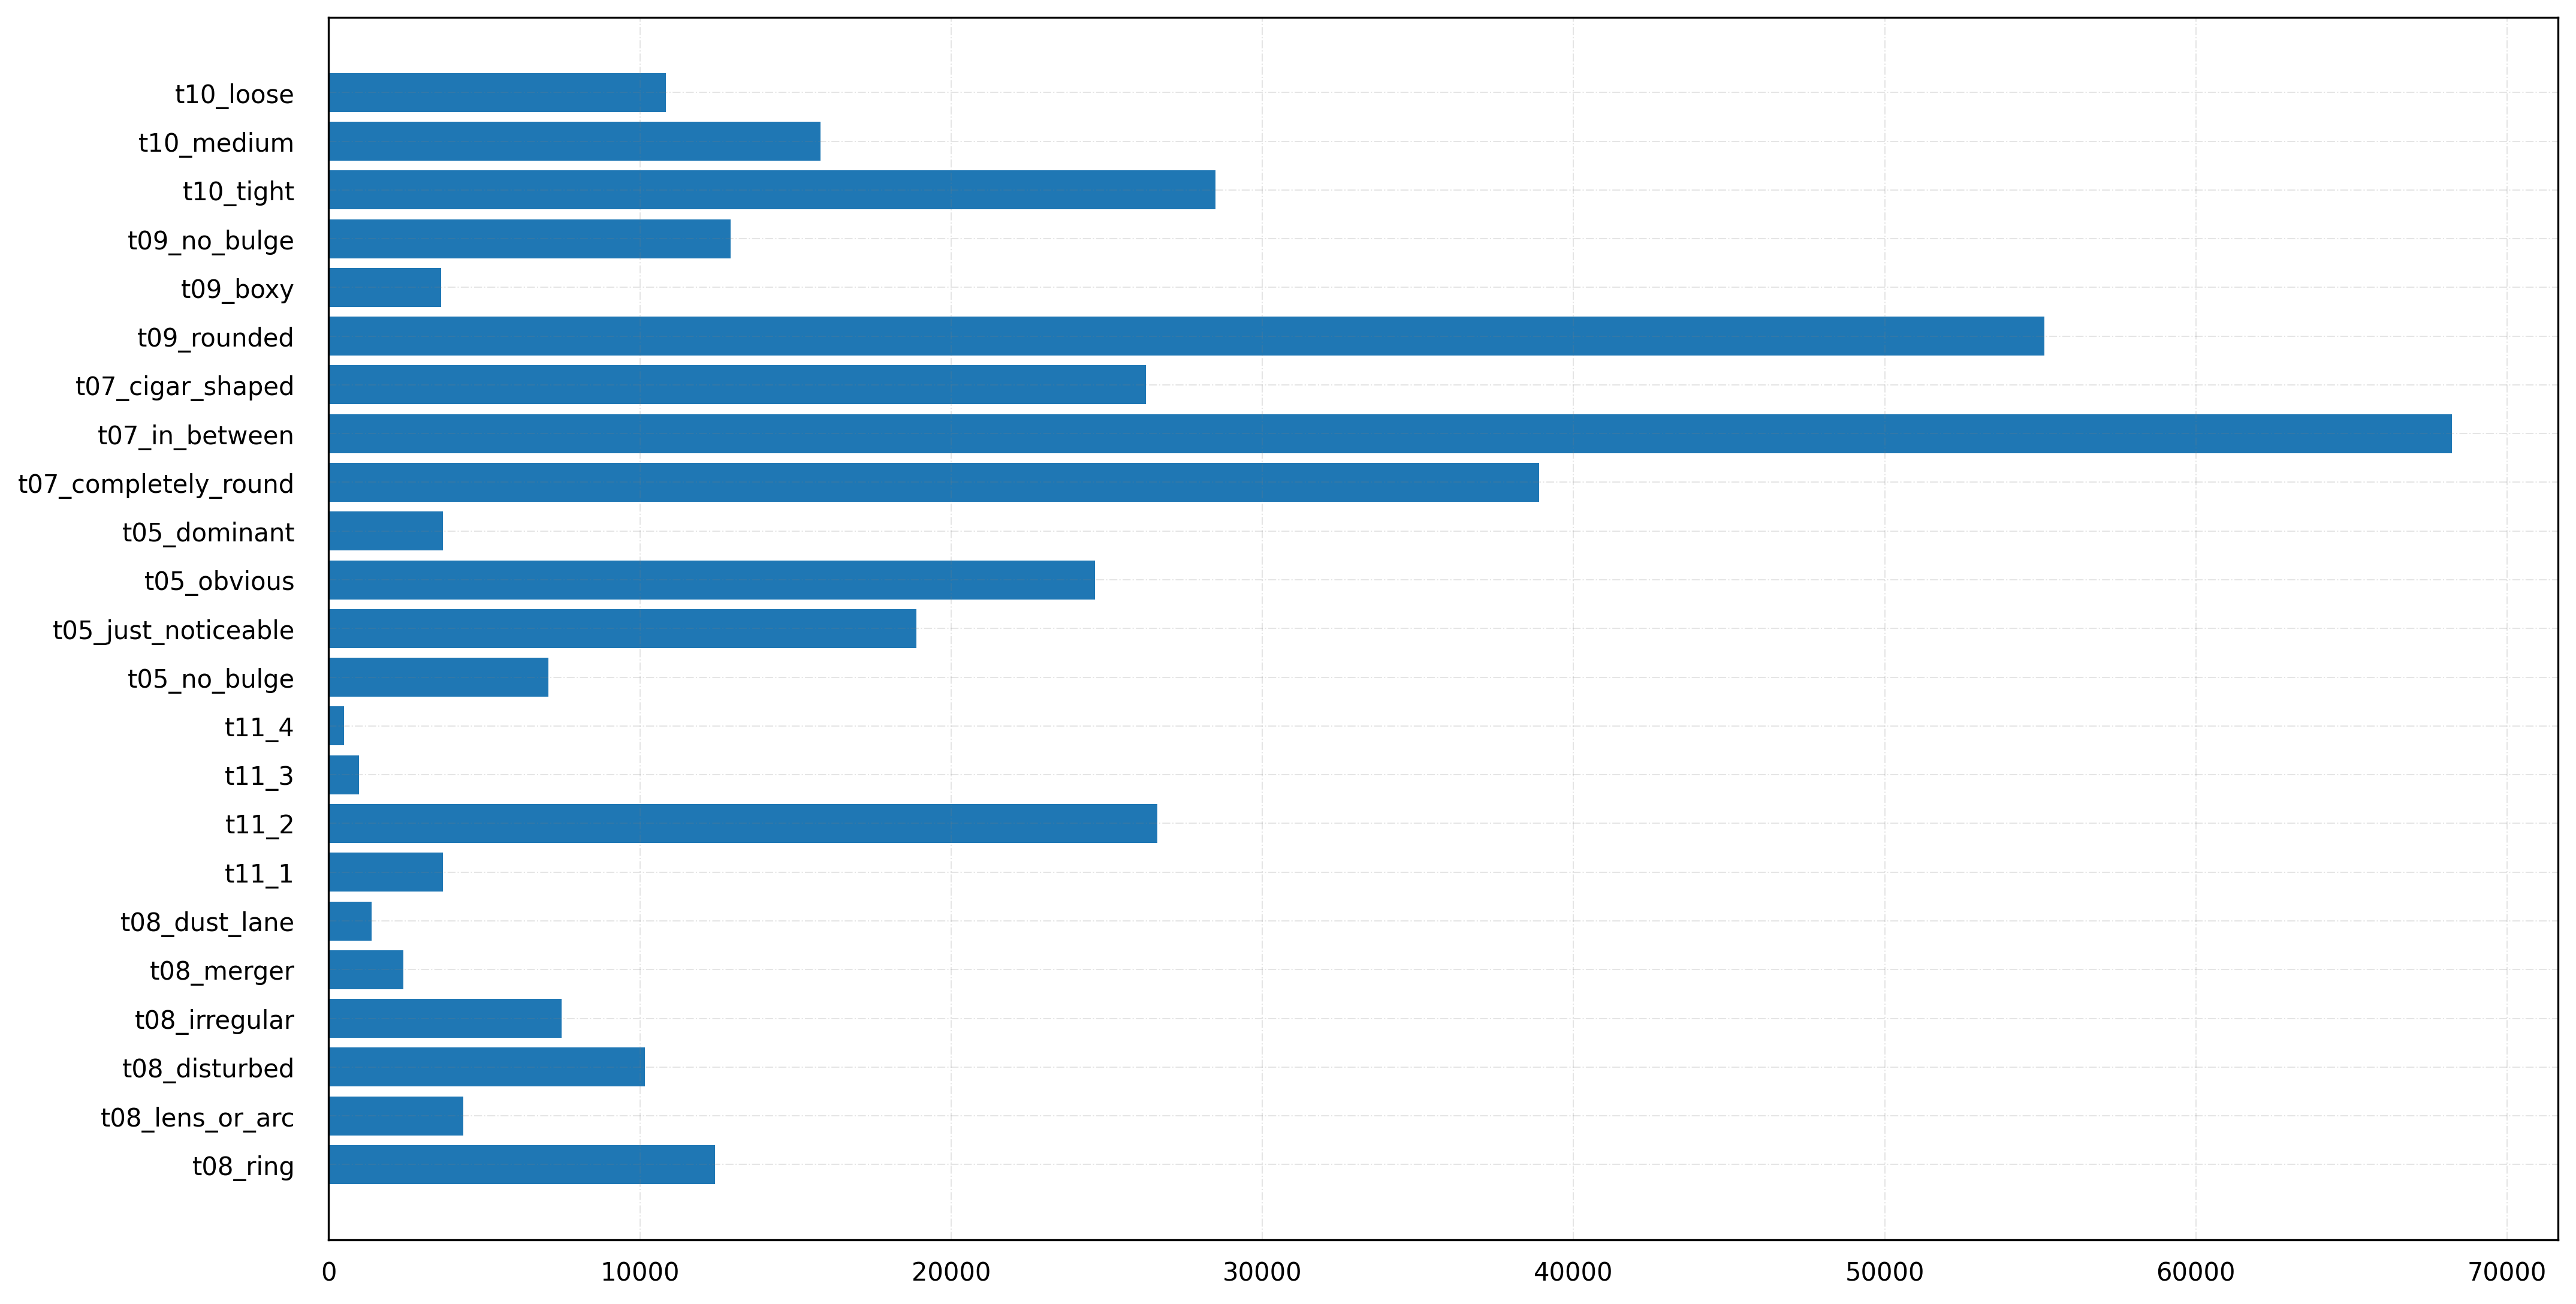

In [37]:
class_size = [len(classe) for classe in img_per_class]
fig, ax = plt.subplots(figsize =(16, 9), dpi = 300)
ax.barh(labels, class_size)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
# Show Plot
plt.show()

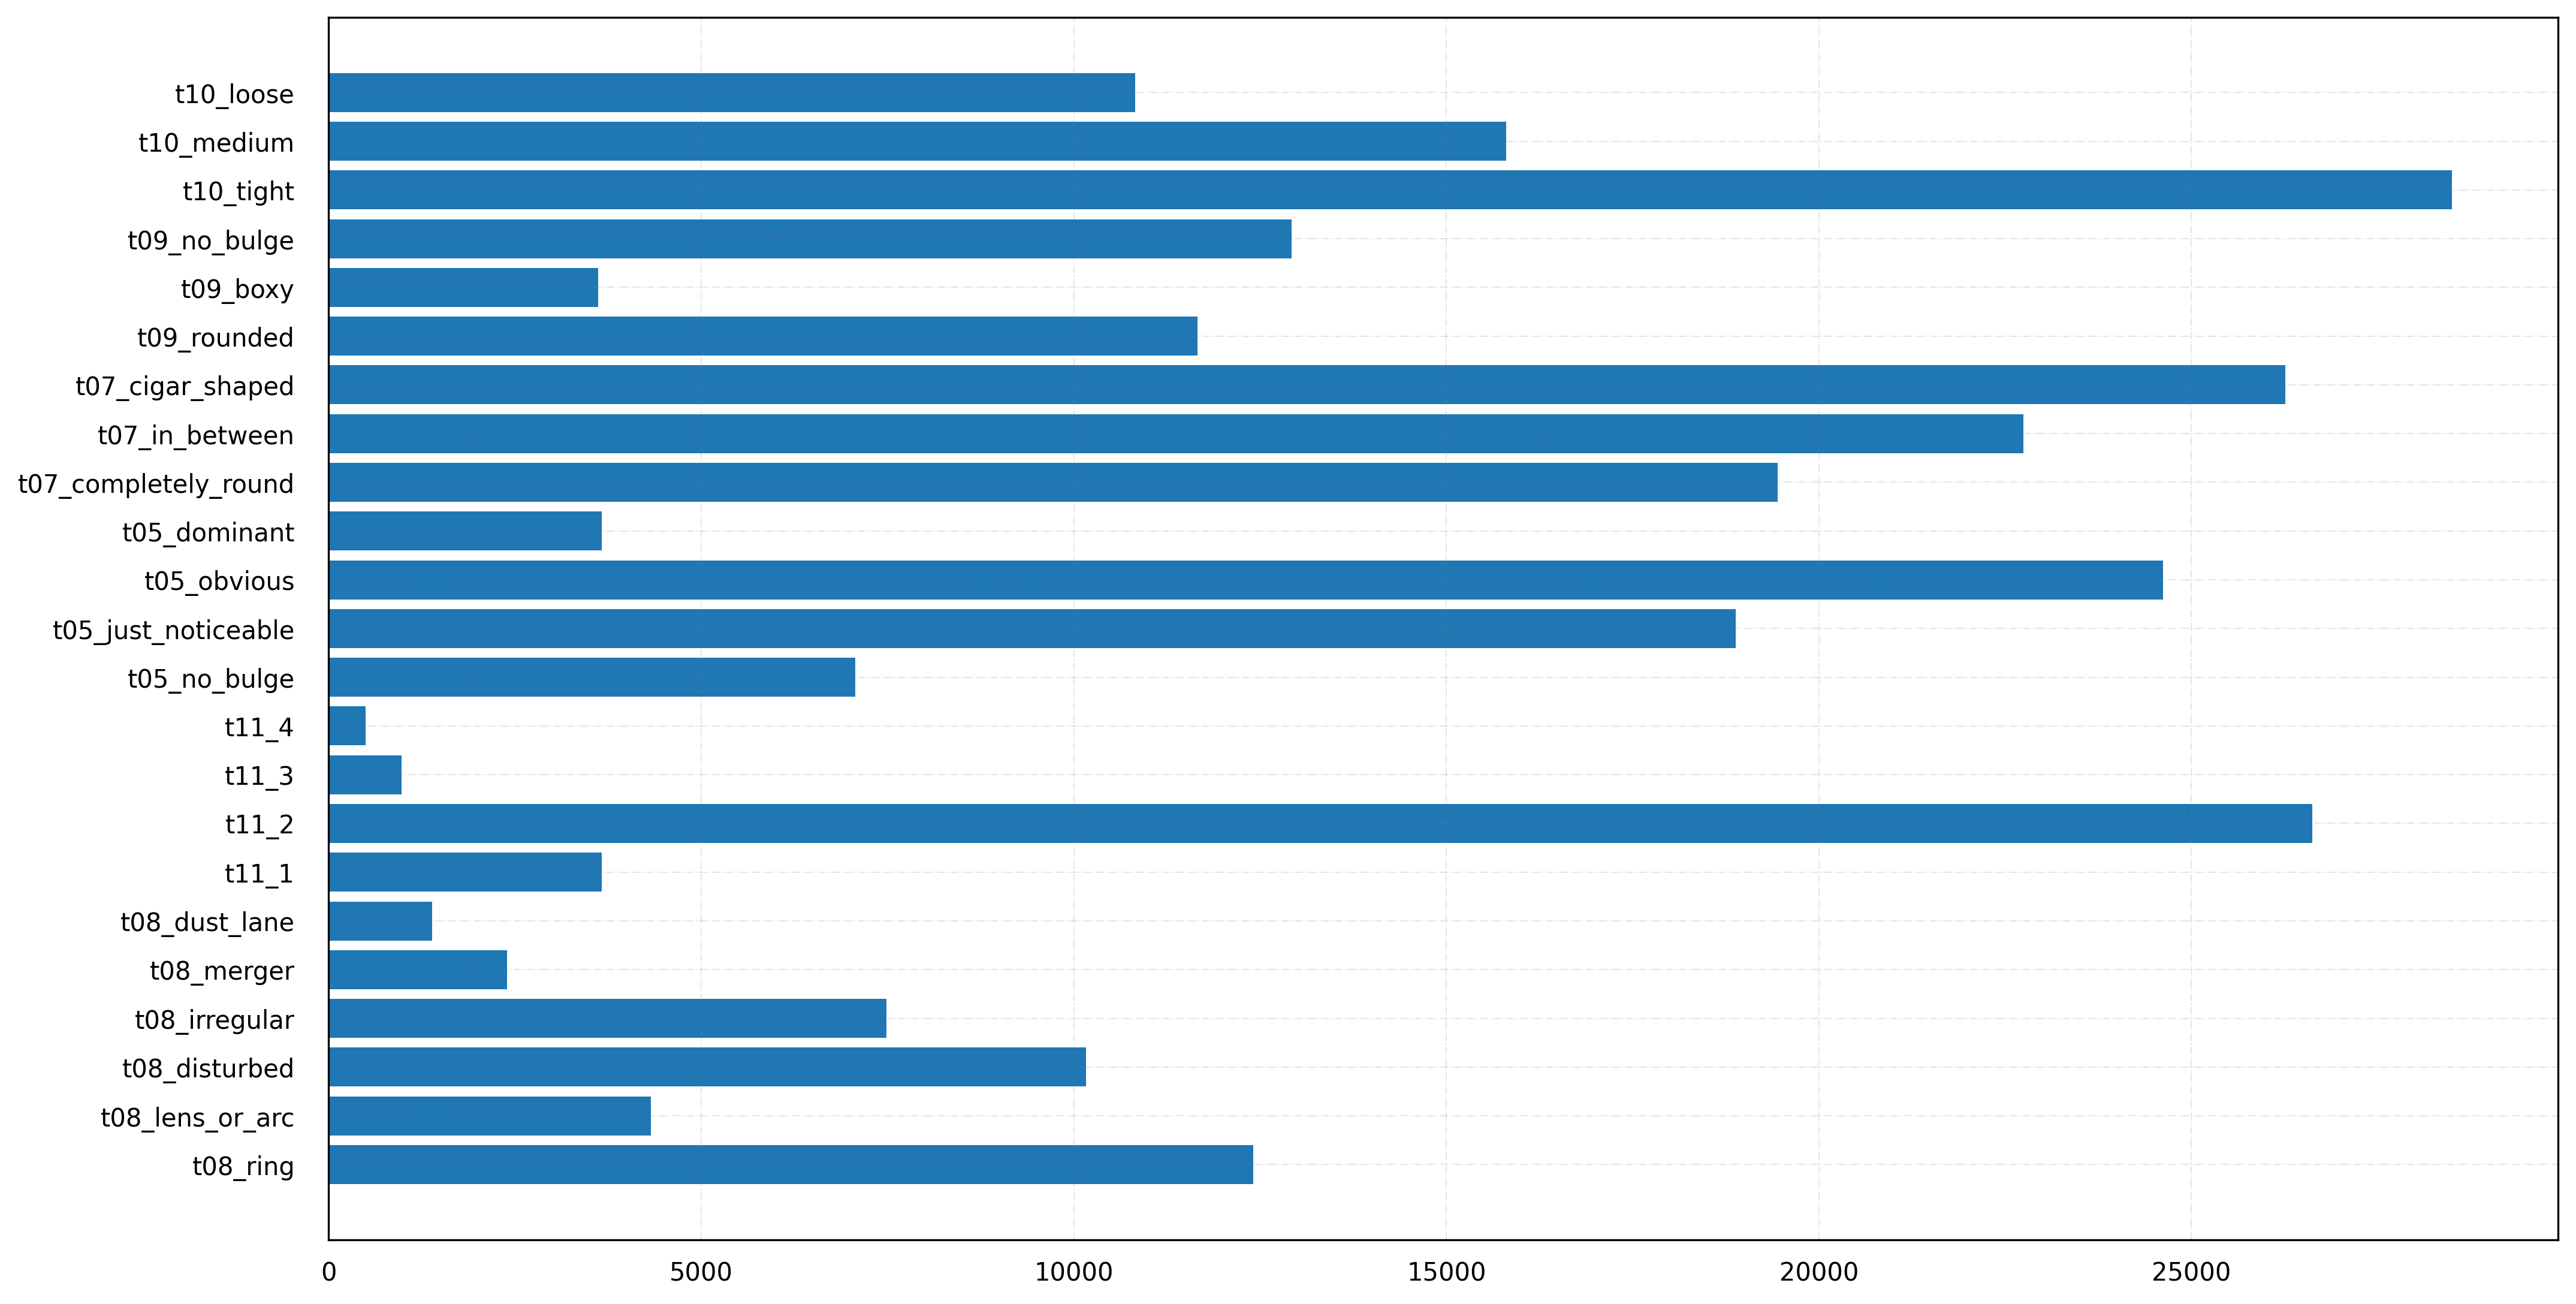

In [41]:
downsamplig(img_per_class)
class_size = [len(classe) for classe in img_per_class]
fig, ax = plt.subplots(figsize =(16, 9), dpi = 300)
ax.barh(labels, class_size)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
# Show Plot
plt.show()